In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration esthétique pour les graphiques
sns.set_theme(style="whitegrid")

In [37]:
# Chargement du dataset 2025
df = pd.read_csv('/content/synthetic_ecommerce_sales_2025.csv')

# Nettoyage des noms de colonnes pour éviter les KeyError
df.columns = df.columns.str.strip().str.lower()

# Conversion de la date si la colonne existe
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'])

# Calcul du Chiffre d'Affaires (Total Amount)
if 'quantity' in df.columns and 'unit_price' in df.columns:
    df['total_amount'] = df['quantity'] * df['unit_price']

In [38]:
# 1. Détection automatique des colonnes par mots-clés
col_cat = [c for c in df.columns if 'cat' in c][0]
col_qty = [c for c in df.columns if 'qty' in c or 'quant' in c][0]
col_price = [c for c in df.columns if 'price' in c or 'unit' in c][0]

# 2. Recréation de 'total_amount' pour être certain qu'il existe
df['total_amount'] = df[col_qty] * df[col_price]

# 3. Calcul de la performance
category_perf = df.groupby(col_cat).agg({
    'total_amount': 'sum',
    col_qty: 'sum',
    col_price: 'mean'
}).sort_values(by='total_amount', ascending=False)

print(f"--- Analyse réussie par {col_cat} ---")
print(category_perf.head())

--- Analyse réussie par product_category ---
                  total_amount  quantity  product_price
product_category                                       
Automotive        1.113189e+07     44235     253.210502
Toys              1.111152e+07     44089     252.609616
Sports            1.110564e+07     44116     251.608431
Electronics       1.104457e+07     44407     249.607167
Fashion           1.104415e+07     44028     251.827683


/tmp/ipython-input-3320006155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_perf.reset_index(), x='product_category', y='total_amount', palette='rocket')


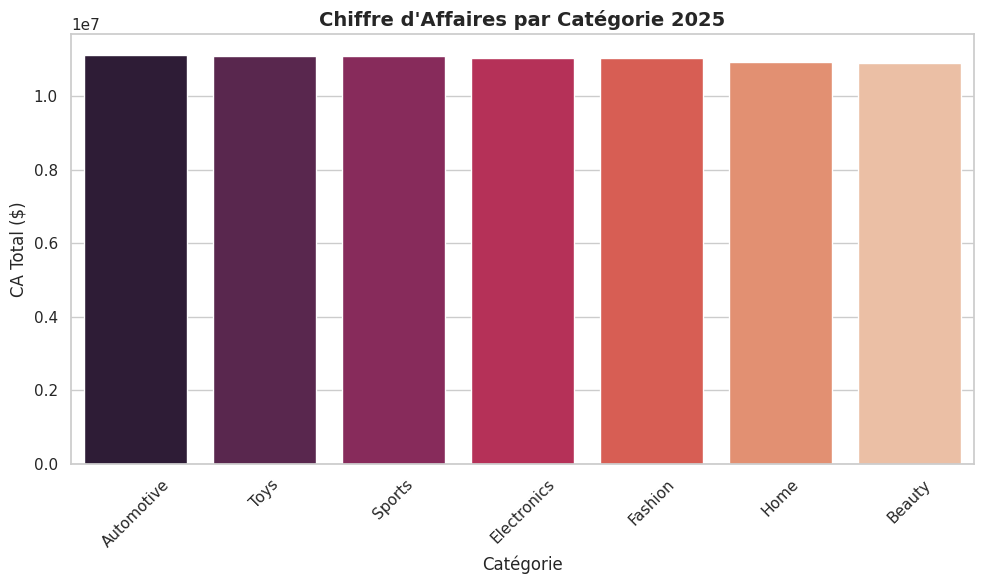

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category_perf.reset_index(), x='product_category', y='total_amount', palette='rocket')
plt.title('Chiffre d\'Affaires par Catégorie 2025', fontsize=14, weight='bold')
plt.ylabel('CA Total ($)', fontsize=12)
plt.xlabel('Catégorie', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ca_categories.png', dpi=300)
plt.show()

In [40]:
# Calcul du panier moyen par catégorie
category_perf['panier_moyen'] = category_perf['total_amount'] / category_perf['quantity']

print("\n--- Top 3 Catégories par Panier Moyen ---")
top3 = category_perf.nlargest(3, 'panier_moyen')[['panier_moyen', 'quantity']]
print(top3)

print("\n💡 Insight: Les catégories avec un panier moyen élevé mais peu de ventes nécessitent plus de marketing.")



--- Top 3 Catégories par Panier Moyen ---
                  panier_moyen  quantity
product_category                        
Toys                252.024806     44089
Sports              251.737202     44116
Automotive          251.653479     44235

💡 Insight: Les catégories avec un panier moyen élevé mais peu de ventes nécessitent plus de marketing.
